In [21]:
import numpy as np
import netket as nk
from itertools import product
import matplotlib.pyplot as plt
import mpltern
from tqdm import tqdm
from Hamiltonians import Kitaev

In [22]:
def compute_energy_gap(hamiltonian):
    evals = nk.exact.lanczos_ed(hamiltonian, k=2, compute_eigenvectors=False)
    return evals[1] - evals[0]

def compute_kitaev_phase_diagram(kitaev_graph, kitaev_hi, J_scale):
    J_product = np.array(list(product(J_scale, repeat=3)))
    J_product /= np.sum(J_product, axis=1, keepdims=True)
    J_product = np.unique(J_product, axis=0)
    gaps = np.zeros(len(J_product))
    for i, J_vec in tqdm(enumerate(J_product)):
        hamiltonian = Kitaev(kitaev_hi, kitaev=kitaev_graph, J=J_vec)
        gaps[i] = compute_energy_gap(hamiltonian)
    return J_product, gaps

In [23]:
J = np.arange(0.05, 1, 0.05)
kitaev = nk.graph.KitaevHoneycomb(extent=[2, 2], pbc=False)
hi_kitaev = nk.hilbert.Spin(s=1/2, N=kitaev.n_nodes)

In [24]:
J_map, energy_gaps = compute_kitaev_phase_diagram(kitaev, hi_kitaev, J)

6517it [00:26, 247.42it/s]


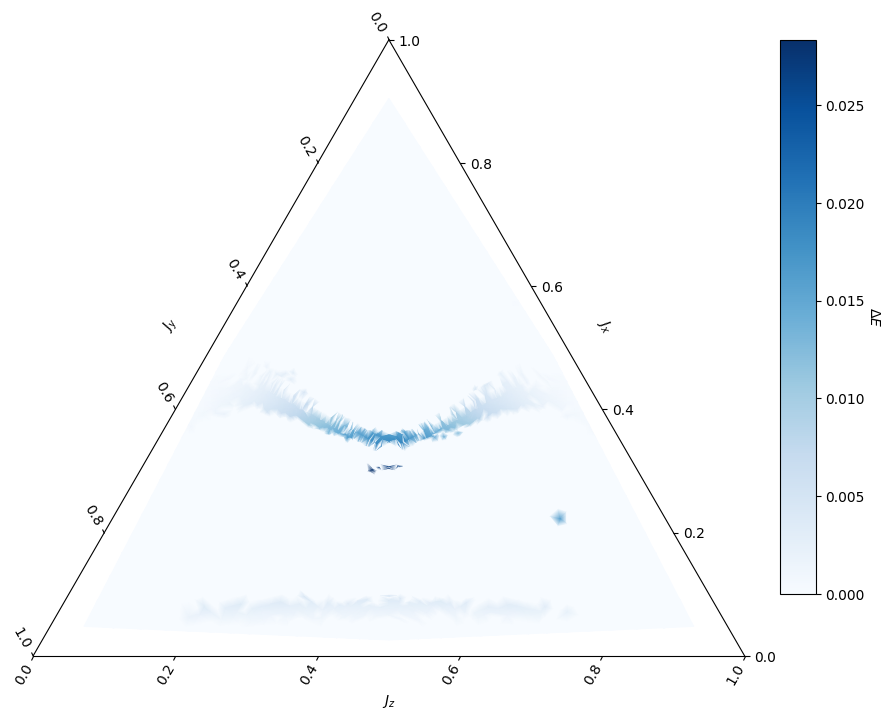

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='ternary')
levels = np.linspace(min(energy_gaps), max(energy_gaps), 1000)
# pc = ax.scatter(J_map[:, 0], J_map[:, 1], J_map[:, 2], c=energy_gaps, s=1, cmap='hot')
# pc = ax.tricontour(J_map[:, 0], J_map[:, 1], J_map[:, 2], energy_gaps, levels=levels, cmap='hot')
pc = ax.tripcolor(J_map[:, 0], J_map[:, 1], J_map[:, 2], energy_gaps, shading='gouraud', vmin=min(energy_gaps), vmax=max(energy_gaps), rasterized=False, cmap='Blues')
cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label('$\Delta E$', rotation=270, va="baseline")
ax.set_tlabel("$J_x$")
ax.set_llabel("$J_y$")
ax.set_rlabel("$J_z$")
ax.taxis.set_label_position("tick1")
ax.laxis.set_label_position("tick1")
ax.raxis.set_label_position("tick1")